In [1]:
#IPO calendar
import requests
import pandas as pd
from dotenv import load_dotenv
import os
import io

load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']
CSV_URL = f'https://www.alphavantage.co/query?function=IPO_CALENDAR&apikey={vantage_key}'

# Fetch data from the CSV URL and create a DataFrame
response = requests.get(CSV_URL)
data = pd.read_csv(io.StringIO(response.text))

# Check if the DataFrame is empty
if data.empty:
    print("No IPO data available at the moment.")
else:
    # Print the DataFrame
    print(data)


  symbol                         name     ipoDate  priceRangeLow  \
0   NLOP  Net Lease Office Properties  2023-11-02              0   
1     ET           Energy Transfer LP  2023-11-03              0   

   priceRangeHigh currency exchange  
0               0      USD     NYSE  
1               0      USD     NYSE  


In [2]:
import requests
import pandas as pd
from dotenv import load_dotenv
import os
import datetime as dt
import json

load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']

# Replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
URL = f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=DIS&apikey={vantage_key}'

today = pd.to_datetime("today").normalize

with requests.Session() as s:
    response = s.get(URL)
    json_data = json.loads(response.content)
    
    # Extract relevant data from the JSON response
    news_data = json_data.get('feed', [])
    
    # Extract title, ticker, and overall_sentiment_label for each news item
    data = []
    for item in news_data:
        ticker_sentiment = item.get('ticker_sentiment', [])
        for ticker_item in ticker_sentiment:
            ticker = ticker_item.get('ticker', '')
            title = item.get('title', '')
            overall_sentiment_label = item.get('overall_sentiment_label', '')
            data.append({'ticker': ticker, 'title': title, 'overall_sentiment_label': overall_sentiment_label})
    
    # Create a DataFrame from the extracted data
    df = pd.DataFrame(data)
    
    df.to_csv(f'output/news_sentiment4.csv')
    
    # Print the DataFrame
    print(df)


    ticker                                              title  \
0    SNEJF                       Punit Goenka passes SAT test   
1      DIS                       Punit Goenka passes SAT test   
2     SPOT  Josh Kushner Is The Less-Famous Billionaire Br...   
3     OSCR  Josh Kushner Is The Less-Famous Billionaire Br...   
4      DIS  Josh Kushner Is The Less-Famous Billionaire Br...   
..     ...                                                ...   
187   SCHL  Interactive Children's Books Market to increas...   
188   PARA  Interactive Children's Books Market to increas...   
189    PSO  Interactive Children's Books Market to increas...   
190  CJREF  Interactive Children's Books Market to increas...   
191    DIS  Interactive Children's Books Market to increas...   

    overall_sentiment_label  
0          Somewhat-Bullish  
1          Somewhat-Bullish  
2          Somewhat-Bullish  
3          Somewhat-Bullish  
4          Somewhat-Bullish  
..                      ...  
187      

In [74]:
#Balance sheet to CSV
import requests
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']

symbol = "CPB"

# Replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers={symbol}&apikey={vantage-key}'
r = requests.get(url)
data = r.json()


df = pd.DataFrame(data, index=data)
print(data)

{'Information': 'Invalid inputs. Please refer to the API documentation https://www.alphavantage.co/documentation#newsapi and try again.'}


In [68]:
#Balance sheet to CSV
import requests
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']

symbol = "CPB"

# Replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers={symbol}&apikey={vantage-key}'
r = requests.get(url)
data = r.json()


df = pd.DataFrame(data)
print(data)

ValueError: If using all scalar values, you must pass an index

In [10]:
print(data['feed'])

[{'title': "Exclusive: DraftKings CEO Says Messi 'A Big Game Changer For MLS,' Women's World Cup Helping Grow Women's Sports Betting - DraftKings  ( NASDAQ:DKNG ) ", 'url': 'https://www.benzinga.com/general/sports-betting/23/08/33588649/exclusive-draftkings-ceo-says-messi-a-big-game-changer-for-mls-womens-world-cup-helping-gr', 'time_published': '20230806T164518', 'authors': ['Chris Katje'], 'summary': "The kickoff of the National Football League's 2023 season could be a big catalyst for sports betting companies like DraftKings Inc DKNG, which just reported second quarter financial results. DraftKings CEO Jason Robins told Benzinga that bets on soccer and women's sports are also seeing growth on ...", 'banner_image': 'https://cdn.benzinga.com/files/images/story/2023/08/06/draftkings.jpg?width=1200&height=800&fit=crop', 'source': 'Benzinga', 'category_within_source': 'General', 'source_domain': 'www.benzinga.com', 'topics': [{'topic': 'Technology', 'relevance_score': '1.0'}, {'topic': '

In [12]:
#Gainers, Losers and Active
import requests
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TOP_GAINERS_LOSERS&apikey={vantage-key}'
r = requests.get(url)
data = r.json()
df = pd.DataFrame(data)

gainers = df['top_gainers']
losers = df['top_losers']
most_active = df['most_actively_traded']
new = pd.DataFrame()
new['Gainers'] = gainers
new['Losers'] = losers
new['Most Active'] = most_active

new.to_csv("gainerslosersandactive.csv")

print(new)

                                              Gainers  \
0   {'ticker': 'OHAAW', 'price': '0.071', 'change_...   
1   {'ticker': 'BRSHW', 'price': '0.035', 'change_...   
2   {'ticker': 'PALI', 'price': '1.44', 'change_am...   
3   {'ticker': 'NBSE', 'price': '2.38', 'change_am...   
4   {'ticker': 'GAQ+', 'price': '0.0947', 'change_...   
5   {'ticker': 'ACONW', 'price': '0.099', 'change_...   
6   {'ticker': 'XOSWW', 'price': '0.0473', 'change...   
7   {'ticker': 'WNNR+', 'price': '0.349', 'change_...   
8   {'ticker': 'PAVMZ', 'price': '0.2', 'change_am...   
9   {'ticker': 'VIIAW', 'price': '0.1648', 'change...   
10  {'ticker': 'FMSTW', 'price': '1.01', 'change_a...   
11  {'ticker': 'MRT+', 'price': '0.0592', 'change_...   
12  {'ticker': 'THTX', 'price': '1.52', 'change_am...   
13  {'ticker': 'DHCAW', 'price': '0.022', 'change_...   
14  {'ticker': 'BHACW', 'price': '0.0022', 'change...   
15  {'ticker': 'MRIN', 'price': '0.6243', 'change_...   
16  {'ticker': 'PW', 'price': '

In [57]:
#Balance sheet to CSV
import requests
import pandas as pd
from dotenv import load_dotenv
import os
import csv

load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']

# Replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
CSV_URL = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=PLTR&apikey={vantage-key}'

with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    for row in my_list:
        print(row)

['{']
['    "items": "50"', '']
['    "sentiment_score_definition": "x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish"', '']
['    "relevance_score_definition": "0 < x <= 1', ' with a higher score indicating higher relevance."', '']
['    "feed": [']
['        {']
['            "title": "Stocks making the biggest moves midday: Beyond Meat', ' Chegg', ' PNC Financial', ' Dish & more"', '']
['            "url": "https://www.cnbc.com/2023/08/08/stocks-making-the-biggest-moves-midday-beyond-meat-chegg-pnc-financial-dish-more.html"', '']
['            "time_published": "20230808T161912"', '']
['            "authors": [']
['                "Pia Singh"']
['            ]', '']
['            "summary": "Regional bank stocks were broadly under pressure on Tuesday after Moody\'s made changes to the credit rating or outlook for more than two dozen banks."', '']
['            "banner_image": "https://image.c

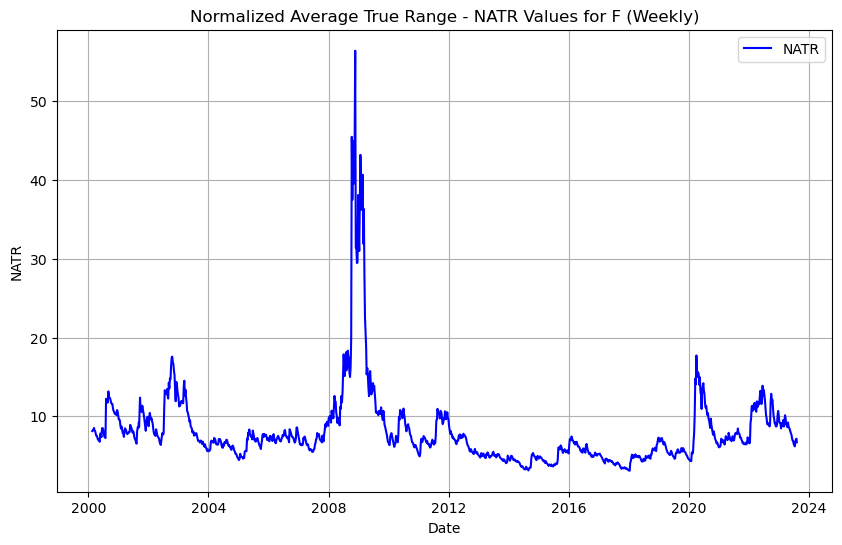

In [61]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
import mplcyberpunk



load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']

symbol = "F"

# Replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=NATR&symbol={symbol}&interval=weekly&time_period=14&apikey={vantage_key}'
r = requests.get(url)
data = r.json()

# Extracting the "NATR" values and dates from the API response
technical_data = data['Technical Analysis: NATR']
dates = [pd.to_datetime(date) for date in technical_data.keys()]
natr_values = [float(value['NATR']) for value in technical_data.values()]

# Create a DataFrame for the NATR data
df = pd.DataFrame({'Date': dates, 'NATR': natr_values})


# Plotting the chart
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['NATR'], label='NATR', color='b')
plt.xlabel('Date')
plt.ylabel('NATR')
plt.title(f'Normalized Average True Range - NATR Values for {symbol} (Weekly)')
plt.legend()
plt.grid(True)
plt.show()



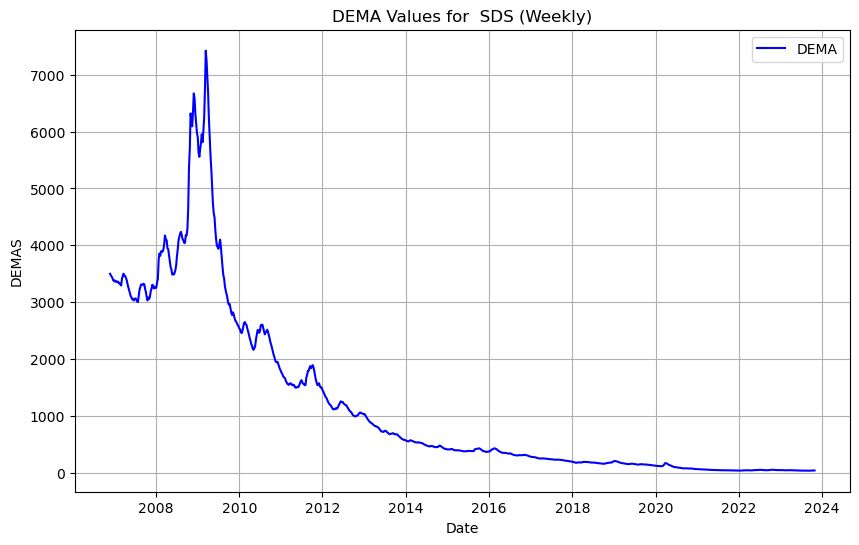

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']

symbol = "SDS"

# Replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=DEMA&symbol={symbol}&interval=weekly&time_period=10&series_type=open&apikey={vantage_key}'
r = requests.get(url)
data = r.json()

# Extracting the "NATR" values and dates from the API response
technical_data = data['Technical Analysis: DEMA']
dates = [pd.to_datetime(date) for date in technical_data.keys()]
natr_values = [float(value['DEMA']) for value in technical_data.values()]

# Create a DataFrame for the NATR data
df = pd.DataFrame({'Date': dates, 'DEMA': natr_values})

# Plotting the chart
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['DEMA'], label='DEMA', color='b')
plt.xlabel('Date')
plt.ylabel('DEMAS')
plt.title(f'DEMA Values for  {symbol} (Weekly)')
plt.legend()
plt.grid(True)
plt.show()


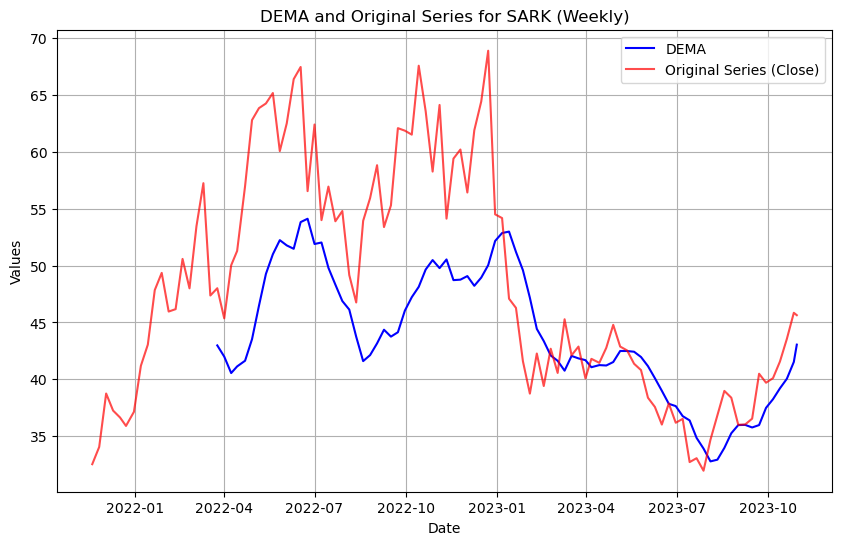

In [1]:
#DEMA overlayed
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']

symbol = "SARK"

# Fetch DEMA data
dema_url = f'https://www.alphavantage.co/query?function=DEMA&symbol={symbol}&interval=weekly&time_period=10&series_type=open&apikey={vantage_key}'
dema_response = requests.get(dema_url)
dema_data = dema_response.json()

# Extracting the "DEMA" values and dates from the DEMA API response
dema_technical_data = dema_data['Technical Analysis: DEMA']
dema_dates = [pd.to_datetime(date) for date in dema_technical_data.keys()]
dema_values = [float(value['DEMA']) for value in dema_technical_data.values()]

# Create a DataFrame for the DEMA data
dema_df = pd.DataFrame({'Date': dema_dates, 'DEMA': dema_values})

# Fetch original series data (closing prices)
original_series_url = f'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol={symbol}&apikey={vantage_key}'
original_series_response = requests.get(original_series_url)
original_series_data = original_series_response.json()

# Extracting the "Weekly Time Series" data (closing prices)
original_series_technical_data = original_series_data['Weekly Time Series']
original_series_dates = [pd.to_datetime(date) for date in original_series_technical_data.keys()]
original_series_values = [float(value['4. close']) for value in original_series_technical_data.values()]

# Create a DataFrame for the original series (closing prices)
original_series_df = pd.DataFrame({'Date': original_series_dates, 'Close': original_series_values})

# Plotting the chart with DEMA and original series
plt.figure(figsize=(10, 6))
plt.plot(dema_df['Date'], dema_df['DEMA'], label='DEMA', color='b')
plt.plot(original_series_df['Date'], original_series_df['Close'], label='Original Series (Close)', color='r', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title(f'DEMA and Original Series for {symbol} (Weekly)')
plt.legend()
plt.grid(True)
plt.show()


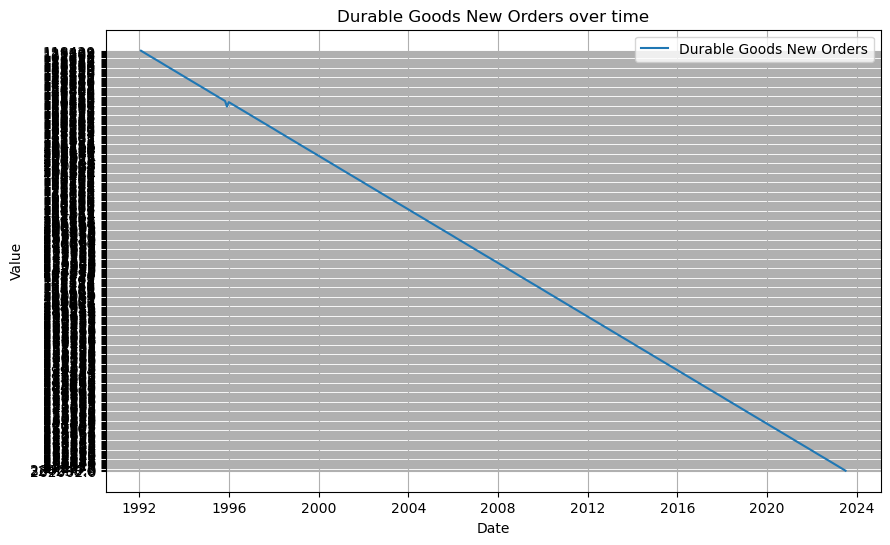

In [19]:
import requests
import pandas as pd
from dotenv import load_dotenv
import os
import io

load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=DURABLES&apikey={VANTAGE_KEY}'
r = requests.get(url)
# Fetch data from the API URL
data = r.json()

# Convert the "data" to a DataFrame
df = pd.DataFrame(data["data"])


# Convert the "date" column to datetime objects for better plotting
df["date"] = pd.to_datetime(df["date"])



# Plotting the chart
plt.figure(figsize=(10, 6))
plt.plot(df["date"], df["value"], label="Durable Goods New Orders")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Durable Goods New Orders over time")
plt.legend()
plt.grid(True)
plt.show()

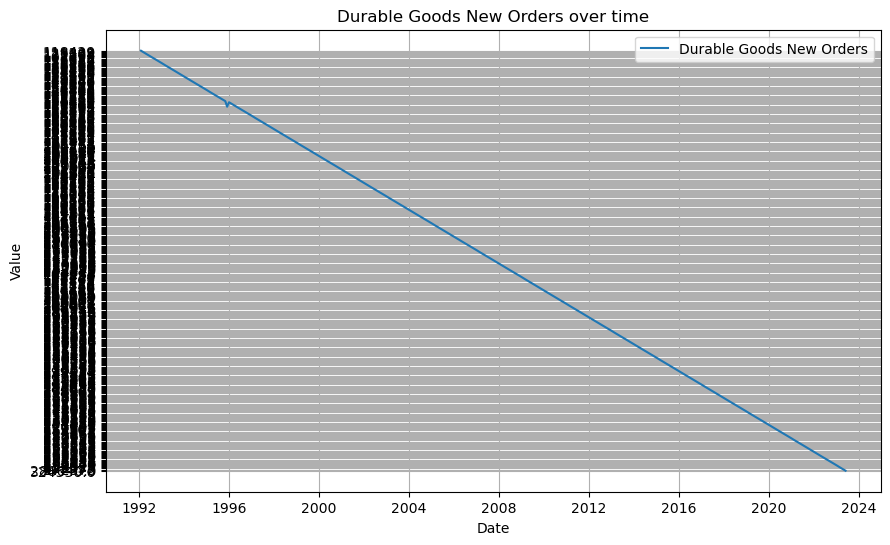

In [54]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='a.env')

vantage_key = os.environ['VANTAGE_KEY']
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=DURABLES&apikey={vantage_key}'
r = requests.get(url)

# Fetch data from the API URL
data = r.json()

# Convert the "data" to a DataFrame
df = pd.DataFrame(data["data"])

# Convert the "date" column to datetime objects for better plotting
df["date"] = pd.to_datetime(df["date"])

# Plotting the chart
plt.figure(figsize=(10, 6))
plt.plot(df["date"], df["value"], label="Durable Goods New Orders")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Durable Goods New Orders over time")
plt.legend()
plt.grid(True)
plt.show()
